# 🤖 Computer Vision Assignment: Real vs. AI-Generated Face Detection

## 📋 **Assignment Overview**

Welcome to this hands-on Computer Vision assignment! You'll build and compare multiple deep learning models to tackle a fascinating modern challenge: **distinguishing real human faces from AI-generated ones**. As AI-generated images become increasingly sophisticated, this task has important implications for digital authenticity, security, and trust online.

## 🎯 **Learning Objectives**

By completing this assignment, you will:
- **Master** fundamental computer vision techniques from simple MLPs to advanced CNNs
- **Implement** data augmentation strategies to improve model generalization
- **Apply** transfer learning using state-of-the-art pre-trained models
- **Optimize** models through fine-tuning, batch normalization and other techniques
- **Deploy** an interactive web application for real-world testing
- **Analyze** and compare different architectural approaches

## 🗂️ **Assignment Structure**

| Part | Topic | Description | Key Skills | Status |
|------|-------|-------------|------------|--------|
| **0** | 🗂️ Dataset Setup | Load and preprocess face images | Data handling, normalization | ✅ Provided |
| **1** | 🔍 Data Exploration | Visualize and understand the dataset | EDA, visualization | ✅ Provided |
| **2** | 🧠 MLP Baseline | Build a simple neural network classifier | Dense layers, fundamentals | ✅ Provided |
| **3** | 🖼️ CNN Implementation | Design a convolutional neural network | Conv2D, pooling, spatial features | ✅ Provided |
| **4** | 🎨 Data Augmentation | Enhance training with image transformations | ImageDataGenerator, regularization | 📝 **TODO** |
| **5** | 🚀 Transfer Learning | Leverage MobileNetV2 pre-trained model | Feature extraction, fine-tuning | 📝 **TODO** |
| **6** | 🔧 Fine-Tuning | Unfreeze and optimize top layers | Advanced optimization | 📝 **TODO** |
| **7** | 📊 Model Comparison | Analyze all models comprehensively | Performance analysis, visualization | 📝 **TODO** |
| **8** | 🎮 Interactive Demo | Build and deploy a Gradio game | Deployment, UI/UX design | 📝 **TODO** |


## 📊 **Dataset Information**
- **Source**: Curated collection of real and AI-generated faces
- **Size**: ~1200 grayscale images (128×128 pixels)
- **Classes**: Binary classification (Real vs. AI-generated)
- **Automatic Download**: The dataset will be automatically downloaded from the instructor's Google Drive when you run Part 0
- **Directory Structure**:
  - `training_real/` - Real face images for training
  - `training_AI/` - AI-generated face images for training
  - `test_real/` - Real face images for testing
  - `test_AI/` - AI-generated face images for testing
- **Important**: The test set is fixed and identical for all students to ensure fair comparison across the class

---

🚀 **Let's begin! Run the cells below sequentially to start your journey into distinguishing real from AI-generated faces!**

## Setup: Import Required Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

print(f"TensorFlow version: {tf.__version__}")
print(f"Running on: {'GPU' if tf.config.list_physical_devices('GPU') else 'CPU'}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

TensorFlow version: 2.19.0
Running on: CPU


## 🗂️ Part 1: Dataset Setup & Preprocessing

### 📊 **What's happening in this section?**

In this initial setup phase, we're preparing our dataset for the exciting journey of distinguishing between **real human faces** and **AI-generated faces**!

#### 🎯 **Key Steps:**
- **📥 Dataset Download**: We fetch a curated dataset of face images from the course repository
- **🖼️ Image Processing**: All images are converted to grayscale and resized to 128×128 pixels
- **📈 Normalization**: Pixel values are scaled to [0,1] range for optimal neural network training
- **🔀 Data Splitting**: We organize our data into three sets:
  - **Test set**: Dedicated, seprate set of 300 images (150 per class) for final evaluation
  - **Training set** (85%): For model learning
  - **Validation set** (15%): For hyperparameter tuning


#### ⚠️ **Important Notes:**
- This cell contains pre-configured code that should **NOT be modified**
- The dataset is balanced with equal numbers of real and AI-generated faces
- All images are processed identically to ensure fair comparison

🚀 **Run the cell below to automatically download and prepare your dataset!**

In [4]:
# ============================================================
# Part 0 - Dataset Setup (Do NOT Modify)
# ============================================================

!pip install -q gdown

import gdown
import os
import zipfile
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Course dataset (hosted on instructor's Google Drive)
#FILE_ID = "1h0kxOEQ5tYvW3eb_xM2mdwhozgG6zPYo"  # Provided by instructor

FILE_ID = "154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX"  # Provided by instructor
url = f"https://drive.google.com/uc?id={FILE_ID}"

print("📥 Downloading dataset from course repository...")
output_path = '/content/real_and_AI.zip'

try:
    gdown.download(url, output_path, quiet=False)

    print("\n📦 Extracting files...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')

    # Clean up zip file
    os.remove(output_path)

    # Verify the download
    real_count = len(os.listdir('/content/real_and_AI/training_real'))
    fake_count = len(os.listdir('/content/real_and_AI/training_AI'))

    print("\n✅ Dataset successfully loaded!")
    print(f"   • Real faces: {real_count} images")
    print(f"   • AI faces: {fake_count} images")

except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    print("Please contact the instructor if this persists.")




📥 Downloading dataset from course repository...


Downloading...
From (original): https://drive.google.com/uc?id=154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX
From (redirected): https://drive.google.com/uc?id=154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX&confirm=t&uuid=a2498f25-ea1f-4e5e-8081-73ff066a5aa0
To: /content/real_and_AI.zip
100%|██████████| 66.9M/66.9M [00:00<00:00, 71.2MB/s]



📦 Extracting files...

✅ Dataset successfully loaded!
   • Real faces: 1001 images
   • AI faces: 1001 images


In [5]:
# ============================================================
# Load images into arrays (Do NOT Modify)
# ============================================================
print("\n" + "="*50)
print("Loading images into arrays...")

def load_images_from_folder(folder_path, label, max_images=600, target_size=(128, 128)):
    """
    Load images from a folder and assign a label.
    Images are converted to grayscale and normalized.
    """
    images, labels = [], []
    image_files = os.listdir(folder_path)[:max_images]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img) / 255.0  # Normalize [0, 1]
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"⚠️ Error loading {img_file}: {e}")

    return np.array(images), np.array(labels)

# Paths
data_path = '/content/real_and_AI/'

# Training images
print("Loading real training images...")
real_images, real_labels = load_images_from_folder(
    os.path.join(data_path, 'training_real'),
    label=1
)
print("Loading AI-generated training images...")
fake_images, fake_labels = load_images_from_folder(
    os.path.join(data_path, 'training_AI'),
    label=0
)

# Combine training
X = np.concatenate([real_images, fake_images])
y = np.concatenate([real_labels, fake_labels])

# Test images (new fixed folders)
print("Loading real test images...")
test_real_images, test_real_labels = load_images_from_folder(
    os.path.join(data_path, 'test_real'),
    label=1
)
print("Loading fake test images...")
test_fake_images, test_fake_labels = load_images_from_folder(
    os.path.join(data_path, 'test_AI'),
    label=0
)

X_test = np.concatenate([test_real_images, test_fake_images])
y_test = np.concatenate([test_real_labels, test_fake_labels])

# Reshape
X = X.reshape(X.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

# Split training further into train/val (70/15/15 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(f"\n✅ Dataset ready for training!")
print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"Image shape: {X_train[0].shape}")
print(f"Real images: {np.sum(y == 1)} | Fake images: {np.sum(y == 0)}")


Loading images into arrays...
Loading real training images...
Loading AI-generated training images...
Loading real test images...
⚠️ Error loading .DS_Store: cannot identify image file '/content/real_and_AI/test_real/.DS_Store'
Loading fake test images...
⚠️ Error loading .DS_Store: cannot identify image file '/content/real_and_AI/test_AI/.DS_Store'

✅ Dataset ready for training!
Train: 1020 | Val: 180 | Test: 300
Image shape: (128, 128, 3)
Real images: 600 | Fake images: 600


### 🔍 Data Exploration & Visualization

### 📊 **Understanding Our Dataset**

Before diving into model building, let's explore and visualize our face dataset to understand what we're working with! This exploration phase is crucial for gaining insights into the characteristics of real vs. AI-generated faces.

#### 🎯 **What we'll discover:**
- **📐 Data Dimensions**: Verify the shapes of our train, validation, and test sets
- **🖼️ Visual Comparison**: Side-by-side comparison of real and AI-generated face samples
- **👤 Average Faces**: Compute the "average" real face vs. the "average" AI face to spot patterns
- **📈 Class Distribution**: Check the balance between real and fake images across all sets

#### 🔬 **Key Observations to Look For:**
- **Texture differences**: AI faces might have smoother or more uniform textures
- **Feature consistency**: Real faces typically show more natural variations
- **Averaged patterns**: The average faces reveal common characteristics of each class

#### 💡 **Pro Tip:**
Pay attention to subtle differences in the averaged faces - these patterns are what our neural network will learn to distinguish!

🚀 **Run the cell below to explore your dataset visually!**

Shapes:
 X_train: (1020, 128, 128, 3)  y_train: (1020,)
 X_val:   (180, 128, 128, 3)  y_val:   (180,)
 X_test:  (300, 128, 128, 3)  y_test:  (300,)



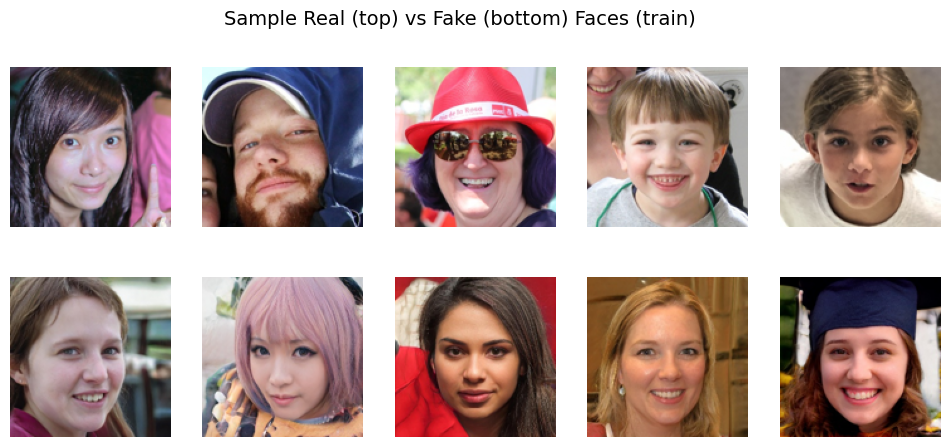

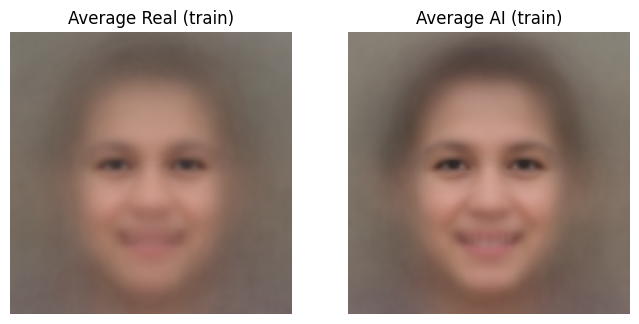

📊 Dataset statistics:
 Train  - Real: 510  AI: 510
 Val    - Real: 90  AI: 90
 Test   - Real: 150  AI: 150


In [6]:
# ============================================================
# Part 1 - Data Exploration
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Quick sanity checks
print("Shapes:")
print(" X_train:", X_train.shape, " y_train:", y_train.shape)
print(" X_val:  ", X_val.shape, " y_val:  ", y_val.shape)
print(" X_test: ", X_test.shape, " y_test: ", y_test.shape)
print()

# Show sample real vs fake images from training set
def pick_n_per_class(X, y, n=5, cls=1):
    idxs = np.where(y == cls)[0]
    sel = np.random.choice(idxs, size=min(n, len(idxs)), replace=False)
    return X[sel]

np.random.seed(42)
real_samples = pick_n_per_class(X_test, y_test, n=5, cls=1)
fake_samples = pick_n_per_class(X_test, y_test, n=5, cls=0)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Real (top) vs Fake (bottom) Faces (train)", fontsize=14)

for i in range(5):
    axes[0, i].imshow(real_samples[i].reshape(128, 128, 3))
    axes[0, i].axis("off")
    axes[1, i].imshow(fake_samples[i].reshape(128, 128, 3))
    axes[1, i].axis("off")
plt.show()

# Compute average faces (train)
avg_real = X_train[y_train == 1].mean(axis=0)
avg_fake = X_train[y_train == 0].mean(axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(avg_real.reshape(128, 128, 3)); ax1.set_title("Average Real (train)"); ax1.axis("off")
ax2.imshow(avg_fake.reshape(128, 128, 3)); ax2.set_title("Average AI (train)"); ax2.axis("off")
plt.show()

# Basic stats
print("📊 Dataset statistics:")
print(" Train  - Real:", np.sum(y_train==1), " AI:", np.sum(y_train==0))
print(" Val    - Real:", np.sum(y_val==1),   " AI:", np.sum(y_val==0))
print(" Test   - Real:", np.sum(y_test==1),  " AI:", np.sum(y_test==0))


## 🧠 Part 2: Multi-Layer Perceptron (MLP) Classifier

### 🏗️ **Building Our First Neural Network**

Time to build our baseline model! We'll start with a classic **Multi-Layer Perceptron (MLP)** - a fully connected neural network that will learn to distinguish real faces from AI-generated ones.

#### 🎯 **Architecture Overview:**
- **Input Layer**: Flattens our 128×128 grayscale images into a 49,152-dimensional vector
- **Hidden Layers**: Three dense layers with decreasing neurons (64 → 32 → 16 → 1)
- **Activation**: ReLU functions for non-linearity in hidden layers
- **Output Layer**: Single neuron with sigmoid activation for binary classification

#### ⚙️ **Training Configuration:**
- **📉 Optimizer**: Adam with learning rate = 0.001
- **🎲 Loss Function**: Binary cross-entropy (perfect for binary classification)
- **📊 Metrics**: Accuracy for intuitive performance tracking
- **🔄 Epochs**: 20 iterations through the entire dataset
- **📦 Batch Size**: 32 samples processed together

#### 📈 **What to Monitor:**
- **Training vs. Validation Curves**: Watch for overfitting if curves diverge
- **Best Validation Accuracy**: The peak performance on unseen data
- **Test Accuracy**: Final unbiased evaluation on held-out test set

#### 💡 **Key Insight:**
MLPs treat images as flat vectors, ignoring spatial relationships between pixels. This baseline will help us appreciate the power of CNNs in the next section!

🚀 **Run the cell below to train your first face detector!**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,299,905 (24.03 MB)

 Trainable params: 6,299,905 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5166 - loss: 5.4582
Epoch 1: val_loss improved from inf to 2.67187, saving model to best_mlp.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.5172 - loss: 5.3873 - val_accuracy: 0.5000 - val_loss: 2.6719
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5191 - loss: 1.9381
Epoch 2: val_loss improved from 2.67187 to 1.75782, saving model to best_mlp.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.5199 - loss: 1.9305 - val_accuracy: 0.5056 - val_loss: 1.7578
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5354 - loss: 1.3611
Epoch 3: val_loss improved from 1.75782 to 1.45264, saving model to best_mlp.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5367 - loss: 1.3514 - val_accuracy: 0.5111 - val_loss: 1.4526
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5546 - loss: 0.9471
Epoch 4: val_loss improved from 1.45264 to 1.00266, sav

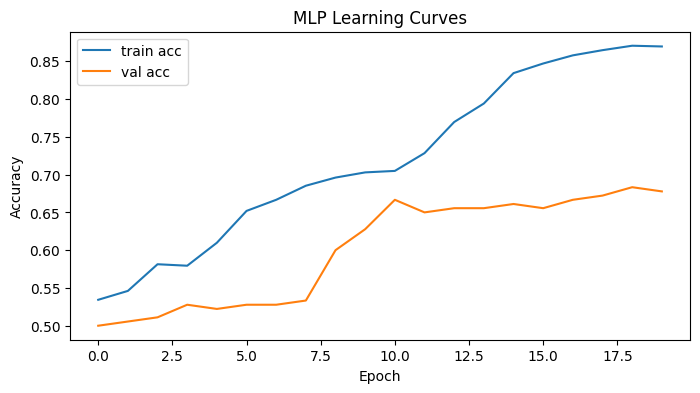

MLP test accuracy (best model): 0.6600


In [7]:
# ============================================================
# Part 2 - Multi-Layer Perceptron
# Jiahuan Note:
#   slightly modified to store the MLP model as best_mlp.keras
# ============================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input # Import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint # Import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(42)

mlp_model = Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer for input shape
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(mlp_model.summary())

# Define checkpoint callback to save the best model
checkpoint_mlp_path = "best_mlp.keras"
checkpoint_mlp = ModelCheckpoint(
    checkpoint_mlp_path,
    monitor='val_loss', # Monitor validation loss
    save_best_only=True, # Save only the best model
    mode='min',          # 'min' mode for loss
    verbose=1            # Print messages when saving
)


history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint_mlp], # Add the checkpoint callback
    verbose=1
)

# Best validation accuracy and epoch
best_val_acc_mlp = np.max(history_mlp.history['val_accuracy'])
best_epoch_mlp = np.argmax(history_mlp.history['val_accuracy']) + 1
best_val_loss_mlp = np.min(history_mlp.history['val_loss']) # Capture best val loss
print(f"MLP best val acc: {best_val_acc_mlp:.4f} at epoch {best_epoch_mlp}")
print(f"MLP best val loss: {best_val_loss_mlp:.4f}") # Print best val loss


# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_mlp.history['accuracy'], label='train acc')
plt.plot(history_mlp.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("MLP Learning Curves")
plt.show()

# Evaluate on test set after loading the best saved model
best_mlp = load_model(checkpoint_mlp_path) # Load the best saved model
mlp_test_loss, mlp_test_acc = best_mlp.evaluate(X_test, y_test, verbose=0)
print(f"MLP test accuracy (best model): {mlp_test_acc:.4f}")

## 🖼️ Part 3: Convolutional Neural Network (CNN) - Baseline

### 🚀 **Leveraging Spatial Features with CNNs**

Now we're stepping up our game! Unlike MLPs that treat images as flat vectors, **Convolutional Neural Networks** understand the spatial structure of images, making them perfect for computer vision tasks.

#### 🏗️ **Architecture Breakdown:**
- **🔍 Conv Layers**: Multiple convolutional blocks with increasing filters (16→32→64)
- **📉 MaxPooling**: (2×2) after each block - Reduces spatial dimensions
- **🎯 BatchNormalization**: Normalizes activations for faster, more stable training
- **💧 Dropout**: Randomly drops connections to prevent overfitting
- **🌐 GlobalAveragePooling2D**: Elegantly reduces feature maps to single values
- **🧠 Dense Layers**: Final classification head with dropout

#### ⚙️ **Key Techniques:**
- **BatchNormalization**: Stabilizes training by normalizing layer inputs
- **Dropout**: Regularization technique (e.g., 0.2 = drop 20% of connections)
- **GlobalAveragePooling2D**: Better than Flatten() - reduces parameters and overfitting
- **Model Checkpointing**: Saves best model based on validation loss

#### 🔬 **What Makes CNNs Special:**
- **Local Connectivity**: Filters scan local regions, detecting patterns anywhere in the image
- **Parameter Sharing**: Same filter applied across the entire image
- **Hierarchical Learning**: Early layers detect edges → Middle layers detect shapes → Deep layers detect faces
- **Translation Invariance**: Can recognize features regardless of position

#### 📊 **Modern Best Practices Applied:**
- Conv → BatchNorm → Activation → Pool → Dropout (repeated blocks)
- GlobalAveragePooling instead of Flatten (fewer parameters, better generalization)
- Gradual increase in filters (16→32→64) as spatial dimensions decrease

🚀 **Run the cell below to train your CNN baseline model with these modern techniques!**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,641 (119.69 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.5056 - loss: 0.7999
Epoch 1: val_loss improved from inf to 0.69440, saving model to best_cnn.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 900ms/step - accuracy: 0.5058 - loss: 0.7989 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.5222 - loss: 0.7545
Epoch 2: val_loss did not improve from 0.69440
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 853ms/step - accuracy: 0.5226 - loss: 0.7539 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.5712 - loss: 0.7078
Epoch 3: val_loss did not improve from 0.69440
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 799ms/step - accuracy: 0.5711 - loss: 0.7076 - val_accuracy: 0.5000 - val_loss: 0.7031
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.5742 - loss: 0.7070
Epoch 4: val_loss did not improve from 0.69440
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 843ms/step - accuracy: 0.5738 - loss: 0.7069 - val_

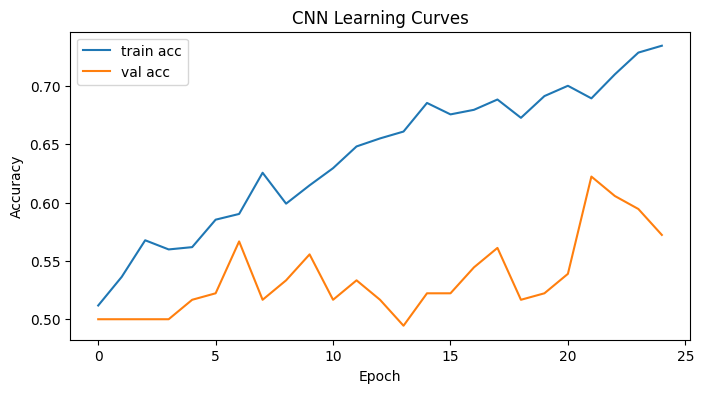

In [8]:
# ============================================================
# Part 3 - Convolutional Neural Network (CNN) - Baseline
# Jiahuan Note:
#   slightly modified to store the MLP model as best_mlp.keras
# ============================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D, Input # Import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# ---- CNN baseline ----

cnn_model = Sequential([
    Input(shape=(128, 128, 3)), # Add Input layer
    # First conv block
    Conv2D(16, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Second conv block
    Conv2D(32, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Third conv block
    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    GlobalAveragePooling2D(),

    Dense(96),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),  # ← Increased final dropout

    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

checkpoint_cnn_path = "best_cnn.keras" # Corrected checkpoint path name
checkpoint_cnn = ModelCheckpoint(checkpoint_cnn_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[checkpoint_cnn],
    verbose=1
)

best_val_acc_cnn = np.max(history_cnn.history['val_accuracy'])
best_val_loss_cnn = np.min(history_cnn.history['val_loss'])
best_epoch_cnn = np.argmin(history_cnn.history['val_loss']) + 1
print(f">> CNN baseline best val acc: {best_val_acc_cnn:.4f} at epoch {best_epoch_cnn}")
print(f">> CNN baseline best val loss: {best_val_loss_cnn:.4f}")


# Load best baseline cnn and evaluate on test set
best_cnn = load_model(checkpoint_cnn_path) # Load the best saved model
cnn_test_loss, cnn_test_acc = best_cnn.evaluate(X_test, y_test, verbose=0)
print(f">> CNN baseline test acc (best model): {cnn_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("CNN Learning Curves")
plt.show()

## 🚀 [TO DO] Part 4: CNN with Data Augmentation

### 🔄 **Why Data Augmentation Matters**

Data augmentation helps getting the most out of the data and also prevent overfitting by creating realistic variations of training images, effectively expanding your dataset without collecting new data. This makes models more robust and better at generalizing to unseen data.

#### 🎯 **Your Task:**
Enhance your CNN's performance using data augmentation for the real vs. AI face classification task.

#### 📝 **Implementation Guide:**

1. **Start with your Part 3 CNN architecture**

2. **Add data augmentation** (choose one approach):
   - **Option A**: Use `ImageDataGenerator` (simpler, but deprecated)
   - **Option B**: Use `tf.keras.layers` augmentation layers (modern approach)
   - Consider: rotation, shifts, zoom, flips
   - Keep transformations realistic and subtle for face images

3. **Train with augmented data**:
   - Apply augmentation ONLY to training data
   - Keep validation data unchanged

4. **Evaluate and compare**:
   - Plot learning curves
   - Compare with baseline performance

#### 🏷️ **Variable Naming**:
- Model: `cnn_aug_model`
- History: `history_cnn_aug`
- Checkpoint: `"best_cnn_aug.keras"`
- Test accuracy: `cnn_aug_test_acc`

#### 💡 **Tips:**
- Start with conservative augmentation parameters
- Monitor validation curves to ensure augmentation is helping
- Good augmentation should reduce the train-validation gap

🚀 **Implement your augmented CNN below:**

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 30,641 (119.69 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.4978 - loss: 0.8124
Epoch 1: val_loss improved from inf to 0.69438, saving model to best_cnn_aug.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 999ms/step - accuracy: 0.4980 - loss: 0.8108 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5299 - loss: 0.7186
Epoch 2: val_loss did not improve from 0.69438
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5301 - loss: 0.7183 - val_accuracy: 0.4944 - val_loss: 0.6950
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.4980 - loss: 0.7454
Epoch 3: val_loss did not improve from 0.69438
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 950ms/step - accuracy: 0.4983 - loss: 0.7450 - val_accuracy: 0.4944 - val_loss: 0.6950
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.5317 - loss: 0.7234
Epoch 4: val_loss did not improve from 0.69438
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 932ms/step - accuracy: 0.5322 - loss: 0.7230 - val_ac

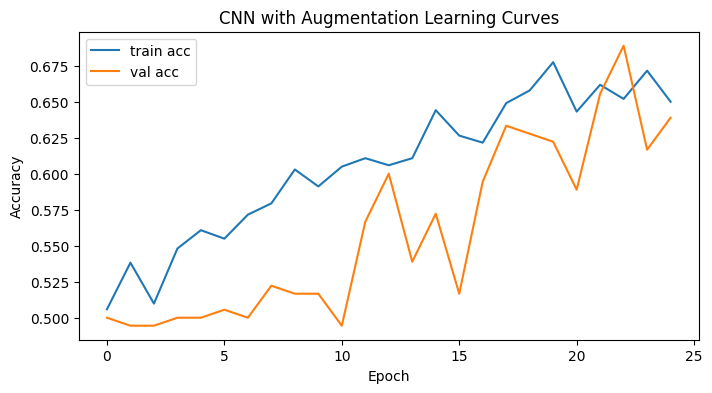

In [9]:
# ============================================================
# CNN with Data Augmentation
# ============================================================

from tensorflow.keras.models import Sequential, load_model, Model # Import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom, Input # Import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# ---- CNN with Data Augmentation ----

# Data Augmentation layers
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.05),
    RandomZoom(0.1),
])

# Define input layer explicitly
input_tensor = Input(shape=(128, 128, 3))

# Build the rest of the model
x = data_augmentation(input_tensor)
# First conv block
x = Conv2D(16, (3,3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.15)(x)

# Second conv block
x = Conv2D(32, (3,3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.15)(x)

# Third conv block
x = Conv2D(64, (3,3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x) # Corrected: Removed the extra (x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.15)(x)

x = GlobalAveragePooling2D()(x)

x = Dense(96)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)

output_tensor = Dense(1, activation='sigmoid')(x)

# Create the model
cnn_aug_model = Model(inputs=input_tensor, outputs=output_tensor)


cnn_aug_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
cnn_aug_model.summary()

checkpoint_cnn_aug_path = "best_cnn_aug.keras"
checkpoint_cnn_aug = ModelCheckpoint(checkpoint_cnn_aug_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_cnn_aug = cnn_aug_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[checkpoint_cnn_aug],
    verbose=1
)

best_val_acc_cnn_aug = np.max(history_cnn_aug.history['val_accuracy'])
best_val_loss_cnn_aug = np.min(history_cnn_aug.history['val_loss'])
best_epoch_cnn_aug = np.argmin(history_cnn_aug.history['val_loss']) + 1
print(f">> CNN with Augmentation best val acc: {best_val_acc_cnn_aug:.4f} at epoch {best_epoch_cnn_aug}")

# Load best augmented cnn and evaluate on test set
best_cnn_aug = load_model(checkpoint_cnn_aug_path)
cnn_aug_test_loss, cnn_aug_test_acc = best_cnn_aug.evaluate(X_test, y_test, verbose=0)
print(f">> CNN with Augmentation test acc (best model): {cnn_aug_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_cnn_aug.history['accuracy'], label='train acc')
plt.plot(history_cnn_aug.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("CNN with Augmentation Learning Curves")
plt.show()

## 🚀 [TO DO] Part 5: Transfer Learning with MobileNetV3

### 🎓 **Standing on the Shoulders of Giants**

Why train from scratch when we can leverage models that have already learned from millions of images? **Transfer learning** allows us to use pre-trained models as powerful feature extractors. **MobileNetV3** (from ICCV 2019), trained on ImageNet's 1.4 million images, has already learned to recognize complex visual patterns that we can adapt for our face detection task!

#### 🎯 **Your Task:**
Implement transfer learning using MobileNetV3Small as a feature extractor for distinguishing real vs. AI-generated faces.

#### 🔎 **Check out their Paper/Presentation [OPTIONAL]:**
https://openaccess.thecvf.com/content_ICCV_2019/html/Howard_Searching_for_MobileNetV3_ICCV_2019_paper.html

#### 📝 **Implementation Steps:**

1. **🔄 Data Preprocessing**:
   - MobileNetV3 expects **[0, 255] range** inputs (NOT [0, 1]!)
   - Scale your data: `X_train_pp = X_train * 255.0`
   - Create preprocessed versions for train, validation, and test sets

2. **📦 Load Pre-trained MobileNetV3Small**:
   - Set `include_top=False` and `pooling='avg'`
   - Use `include_preprocessing=True` (handles internal scaling to [-1, 1])
   - Input shape: (128, 128, 3)

3. **🔒 Freeze Base Model**:
   - Set `base.trainable = False` to preserve ImageNet features

4. **🏗️ Build Complete Model**:
   - Add a small classifier head on top of the base model
   - Include regularization (Dropout, BatchNorm) to prevent overfitting

5. **⚙️ Compile & Train**:
   - Use Adam optimizer with low learning rate (e.g., 0.001, 0.0001, or 0.0005)
   - Consider data augmentation for better generalization
   - Save best model with ModelCheckpoint

6. **📊 Evaluate**:
   - Plot training curves (val loss vs training loss)
   - Report best validation accuracy and test accuracy

#### 🏷️ **Variable Naming Convention**:
- Preprocessed data: `X_train_pp`, `X_val_pp`, `X_test_pp`
- Model: `mobilenet_frozen`
- History: `history_mob_frozen`

#### 💡 **Pro Tips:**
- MobileNetV3Small has ~1.5M parameters - keep them frozen for this task
- The warning about 224x224 weights is normal - the model adapts to 128x128
- Transfer learning should converge quickly (often best results within 10-20 epochs)


🚀 **Time to harness the power of transfer learning! Code below:**

/usr/local/lib/python3.12/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Base MobileNetV3Small layers frozen.
Number of trainable weights in base model: 0

MobileNetV3Small (Frozen + Augmentation) Model Summary:


Model: "mobilenet_frozen"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 576)            │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 576)            │         2,304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 96)             │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996,913 (3.80 MB)

 Trainable params: 56,641 (221.25 KB)

 Non-trainable params: 940,272 (3.59 MB)


Starting training for MobileNetV3Small (Frozen + Augmentation)...
Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5191 - loss: 0.9049
Epoch 1: val_loss improved from inf to 0.60742, saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.5207 - loss: 0.9023 - val_accuracy: 0.6833 - val_loss: 0.6074
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6515 - loss: 0.6314
Epoch 2: val_loss improved from 0.60742 to 0.59601, saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.6514 - loss: 0.6317 - val_accuracy: 0.6833 - val_loss: 0.5960
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6879 - loss: 0.5988
Epoch 3: val_loss improved from 0.59601 to 0.57627, saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.6878 - loss: 0.5989 - val_accuracy: 0.7000 - val_loss: 0.5763
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

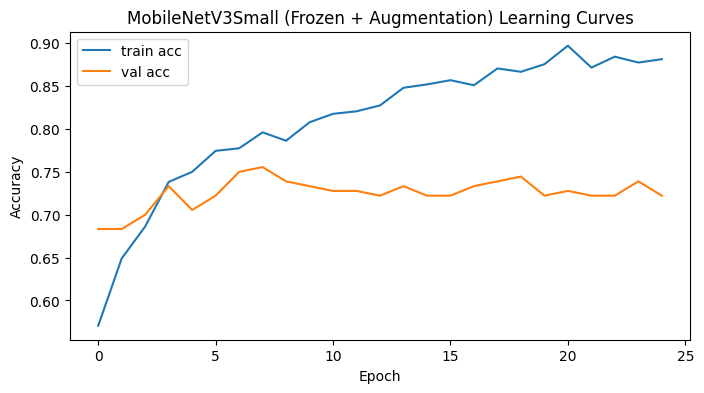

In [10]:
# ============================================================
# Part 5 - Transfer Learning (MobileNetV3Small) with Data Augmentation
# ============================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, Input # Import augmentation layers and Input
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preprocessing: Scale data to [0, 255] for MobileNetV3
X_train_pp = X_train * 255.0
X_val_pp = X_val * 255.0
X_test_pp = X_test * 255.0

# Data Augmentation layers (apply to [0, 255] data)
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.05),
    RandomZoom(0.1),
], name="data_augmentation")


# 2. Load Pre-trained MobileNetV3Small
base_model = MobileNetV3Small(
    input_shape=(128, 128, 3),
    include_top=False,
    pooling='avg',
    weights='imagenet',
    include_preprocessing=True # Handles the scaling from [0, 255] to [-1, 1]
)

# 3. Freeze Base Model
base_model.trainable = False
print("Base MobileNetV3Small layers frozen.")
print(f"Number of trainable weights in base model: {len(base_model.trainable_weights)}")


# 4. Build Complete Model
mobilenet_frozen = Sequential([
    Input(shape=(128, 128, 3)),
    data_augmentation, # Add data augmentation before the base model
    base_model, # Add the frozen base model
    # Add a small classifier head
    BatchNormalization(),
    Dense(96, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
], name="mobilenet_frozen")


# 5. Compile & Train
mobilenet_frozen.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nMobileNetV3Small (Frozen + Augmentation) Model Summary:")
mobilenet_frozen.summary()

# Checkpoint path
checkpoint_mob_frozen_path = "best_mobilenet_frozen.keras"
checkpoint_mob_frozen = ModelCheckpoint(
    checkpoint_mob_frozen_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

print("\nStarting training for MobileNetV3Small (Frozen + Augmentation)...")
# History variable
history_mob_frozen = mobilenet_frozen.fit(
    X_train_pp, y_train, # Use preprocessed training data (0-255)
    validation_data=(X_val_pp, y_val), # Use preprocessed validation data (0-255)
    epochs=25, # Train for a reasonable number of epochs
    batch_size=32,
    callbacks=[checkpoint_mob_frozen],
    verbose=1
)

# Best validation accuracy and epoch
best_val_acc_mob_frozen = np.max(history_mob_frozen.history['val_accuracy'])
best_val_loss_mob_frozen = np.min(history_mob_frozen.history['val_loss'])
best_epoch_mob_frozen = np.argmin(history_mob_frozen.history['val_loss']) + 1
print(f"\n>> MobileNetV3Small (Frozen + Augmentation) best val acc: {best_val_acc_mob_frozen:.4f} at epoch {best_epoch_mob_frozen}")

# Load best augmented frozen MobileNetV3Small model and evaluate on test set
best_mob_frozen = load_model(checkpoint_mob_frozen_path)
mob_frozen_test_loss, mob_frozen_test_acc = best_mob_frozen.evaluate(X_test_pp, y_test, verbose=0) # Use preprocessed test data
print(f">> MobileNetV3Small (Frozen + Augmentation) test acc (best model): {mob_frozen_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_mob_frozen.history['accuracy'], label='train acc')
plt.plot(history_mob_frozen.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("MobileNetV3Small (Frozen + Augmentation) Learning Curves")
plt.show()

## 🚀 [TO DO] Part 6: Fine-tuning MobileNetV3

### 🎯 **Taking it Further with Fine-tuning**

Now that we've seen transfer learning with frozen weights, let's unlock the power of **fine-tuning**! We'll carefully unfreeze and retrain the last few layers of MobileNetV3 to adapt them specifically to our face detection task.

#### 📝 **Implementation Steps:**

1. **🔓 Selective Unfreezing**:
   - Start with your trained frozen model from Part 5
   - Unfreeze only the **last very few layers** of the base model (e.g., last 1-2 layers)
   - Keep early layers frozen - they contain generic low-level features

2. **⚙️ Re-compile with Lower Learning Rate**:
   - Use an even lower learning rate to avoid destroying pre-trained features
   - Fine-tuning requires gentle weight updates!

3. **🎯 Train for Fine-tuning**:
   - Train for 15-30 epochs
   - Monitor closely - fine-tuning can lead to overfitting
   - Save the best model with ModelCheckpoint

4. **📊 Compare Results**:
   - Plot learning curves for fine-tuned model
   - Compare test accuracy: frozen vs fine-tuned
   - Which approach works better for this task?

#### 🏷️ **Variable Naming Convention**:
- Fine-tuned model: `mobilenet_finetuned`
- History: `history_mob_finetuned`
- Checkpoint: `"best_mobilenet_finetuned.keras"`

#### 💡 **Pro Tips:**
- Check how many layers you're unfreezing with `sum([layer.trainable for layer in base.layers])`
- Fine-tuning could potentially give you few % improvement
- It's much easier now for your model to overfit - reduce learning rate and/or add more regularization

#### 🤔 **Think About:**
- What startegies to use to make fine-tuning work better?
- Which layers (early or late) are more task-specific?
- When might fine-tuning hurt rather than help performance?

🚀 **Let's squeeze out every bit of performance! Code below:**

Found base model: MobileNetV3Small

Attempting to unfreeze the last 1 layer(s) of the base model.
Number of trainable layers in base model after unfreezing: 1

MobileNetV3Small (Fine-tuned) Model Summary (showing trainable layers):


Model: "mobilenet_frozen"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 576)            │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 576)            │         2,304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 96)             │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996,913 (3.80 MB)

 Trainable params: 56,641 (221.25 KB)

 Non-trainable params: 940,272 (3.59 MB)


Starting training for MobileNetV3Small (Fine-tuned)...
Epoch 26/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8220 - loss: 0.3979
Epoch 26: val_loss improved from inf to 0.53375, saving model to best_mobilenet_finetuned.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.8221 - loss: 0.3978 - val_accuracy: 0.7278 - val_loss: 0.5337
Epoch 27/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8268 - loss: 0.3988
Epoch 27: val_loss did not improve from 0.53375
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.8270 - loss: 0.3987 - val_accuracy: 0.7222 - val_loss: 0.5350
Epoch 28/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.8330 - loss: 0.3858
Epoch 28: val_loss did not improve from 0.53375
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.8328 - loss: 0.3860 - val_accuracy: 0.7222 - val_loss: 0.5364
Epoch 29/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8348 - loss: 0.3610
Epoch 29: val_loss did not improve from 0.53375
32/3

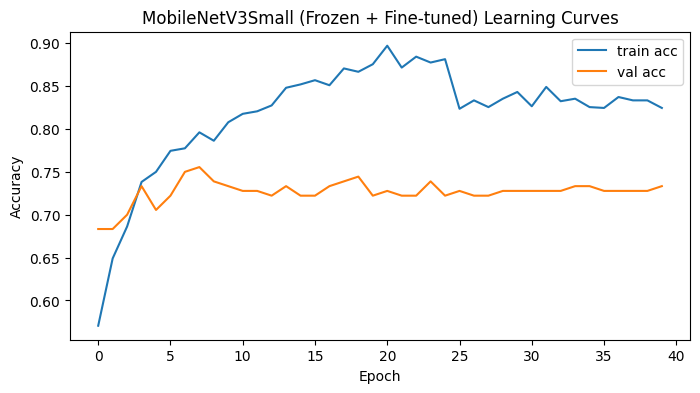

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
# ============================================================
# Part 6 - Transfer Learning (MobileNetV3Small) + Fine-tuning
# ============================================================

# 1. Start with the trained frozen model from Part 5
best_mob_frozen = load_model("best_mobilenet_frozen.keras")

# Get the base MobileNetV3 model from the loaded model
# The structure is: Input -> data_augmentation -> base_model -> classifier layers
# Thus:
base_model_finetune = best_mob_frozen.layers[1]
print(f"Found base model: {base_model_finetune.name}")

# 2. Selective Unfreezing: Unfreeze only the last few layers
# Just unfreeze the last 1 layer.
num_layers_to_unfreeze = 1
print(f"\nAttempting to unfreeze the last {num_layers_to_unfreeze} layer(s) of the base model.")

# Set all layers in the base model to trainable=True first, then selectively freeze
base_model_finetune.trainable = True
for layer in base_model_finetune.layers[:-num_layers_to_unfreeze]:
    layer.trainable = False

print(f"Number of trainable layers in base model after unfreezing: {sum([layer.trainable for layer in base_model_finetune.layers])}")

# 3. Re-compile with Lower Learning Rate
mobilenet_finetuned = best_mob_frozen # Continue training the same model instance
mobilenet_finetuned.compile(
    optimizer=Adam(learning_rate=1e-5), # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nMobileNetV3Small (Fine-tuned) Model Summary (showing trainable layers):")
mobilenet_finetuned.summary() # Check the trainable parameters

checkpoint_mob_finetuned_path = "best_mobilenet_finetuned.keras"
checkpoint_mob_finetuned = ModelCheckpoint(
    checkpoint_mob_finetuned_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# 4. Train for Fine-tuning
print("\nStarting training for MobileNetV3Small (Fine-tuned)...")
history_mob_finetuned = mobilenet_finetuned.fit(
    X_train_pp, y_train, # Use preprocessed training data
    validation_data=(X_val_pp, y_val), # Use preprocessed validation data
    epochs=40, # Train for additional epochs (e.g., 20 more than frozen)
    initial_epoch=history_mob_frozen.epoch[-1] + 1, # Start from the last epoch of frozen training
    batch_size=32,
    callbacks=[checkpoint_mob_finetuned],
    verbose=1
)

# Best validation accuracy and epoch for fine-tuned model
best_val_acc_mob_finetuned = np.max(history_mob_finetuned.history['val_accuracy'])
best_val_loss_mob_finetuned = np.min(history_mob_finetuned.history['val_loss'])
# Need to adjust epoch number by adding the initial epoch offset
best_epoch_mob_finetuned = np.argmin(history_mob_finetuned.history['val_loss']) + history_mob_frozen.epoch[-1] + 2
print(f"\n>> MobileNetV3Small (Fine-tuned) best val acc: {best_val_acc_mob_finetuned:.4f} at epoch {best_epoch_mob_finetuned}")

# Load best fine-tuned MobileNetV3Small model and evaluate on test set
best_mob_finetuned = load_model(checkpoint_mob_finetuned_path)
mob_finetuned_test_loss, mob_finetuned_test_acc = best_mob_finetuned.evaluate(X_test_pp, y_test, verbose=0) # Use preprocessed test data
print(f">> MobileNetV3Small (Fine-tuned) test acc (best model): {mob_finetuned_test_acc:.4f}")

# 5. Plot learning curves
# Combine history from frozen and fine-tuned training for a complete view
total_train_acc = history_mob_frozen.history['accuracy'] + history_mob_finetuned.history['accuracy']
total_val_acc = history_mob_frozen.history['val_accuracy'] + history_mob_finetuned.history['val_accuracy']

plt.figure(figsize=(8,4))
plt.plot(total_train_acc, label='train acc')
plt.plot(total_val_acc, label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("MobileNetV3Small (Frozen + Fine-tuned) Learning Curves")
plt.show()

## 🚀 [TO DO] Part 7: Model Comparison & Analysis

### 🏆 **The Ultimate Showdown: Which Model Reigns Supreme?**

Time to put all your models head-to-head! Let's comprehensively compare the performance of all approaches: MLP, CNN baseline, CNN with augmentation, MobileNetV3 transfer learning, and MobileNetV3 fine-tuned.

#### 🎯 **Your Task:**
Create comprehensive visualizations and analyses to compare all models and understand their predictions.

#### 📝 **Required Implementations:**

1. **📈 Performance Comparison Bar Chart**:
   - Create a grouped bar chart showing:
     - Best validation accuracy for each model
     - Test accuracy for each model
   - Models to compare: `MLP`, `CNN`, `CNN+Aug`, `MobileNet`, `MobileNet-FT`
   - Use different colors for validation vs. test metrics

2. **🎭 Confusion Matrices Grid**:
   - Generate predictions for all models on the test set
   - Create a 2×3 subplot grid showing confusion matrices
   - Include model names and test accuracy in titles
   - Use heatmap visualization with annotations showing counts

3. **🖼️ Qualitative Analysis - Sample Predictions**:
   - Select 8-10 interesting test images (mix of correct and incorrect predictions)
   - For each image, display:
     - The actual image
     - True label (T:0 for AI, T:1 for Real)
     - Predictions from ALL models (scores from sigmoid output)
   - Format: Image with model predictions listed below
   - Highlight disagreements between models


#### 💡 **Visualization Tips:**
- Use `plt.subplots()` for organized multi-panel figures
- Color-code: Green for correct predictions, Red for incorrect
- Sort confusion matrix with true labels on y-axis, predicted on x-axis
- For sample images, show probability scores (0.0 = AI, 1.0 = Real)

#### 🔍 **Analysis Questions to Answer:**
1. **Performance Ranking**: Which model performs best on the test set?
2. **Generalization**: Which model has the smallest train-validation gap?
3. **Confusion Patterns**: Do certain models favor precision vs. recall?
4. **Failure Cases**: What types of faces fool all models?
5. **Model Consensus**: When models disagree, which one is usually right?

#### 📊 **Expected Outputs:**
```python
Example format for displaying predictions
Image: [displayed]
True: 1 (Real)
MLP: 0.58 ✓ | CNN: 0.45 ✗ | CNN+Aug: 0.50 ✗
MobileNet: 0.75 ✓ | MobileNet-FT: 0.74 ✓

MODEL COMPARISON & ANALYSIS


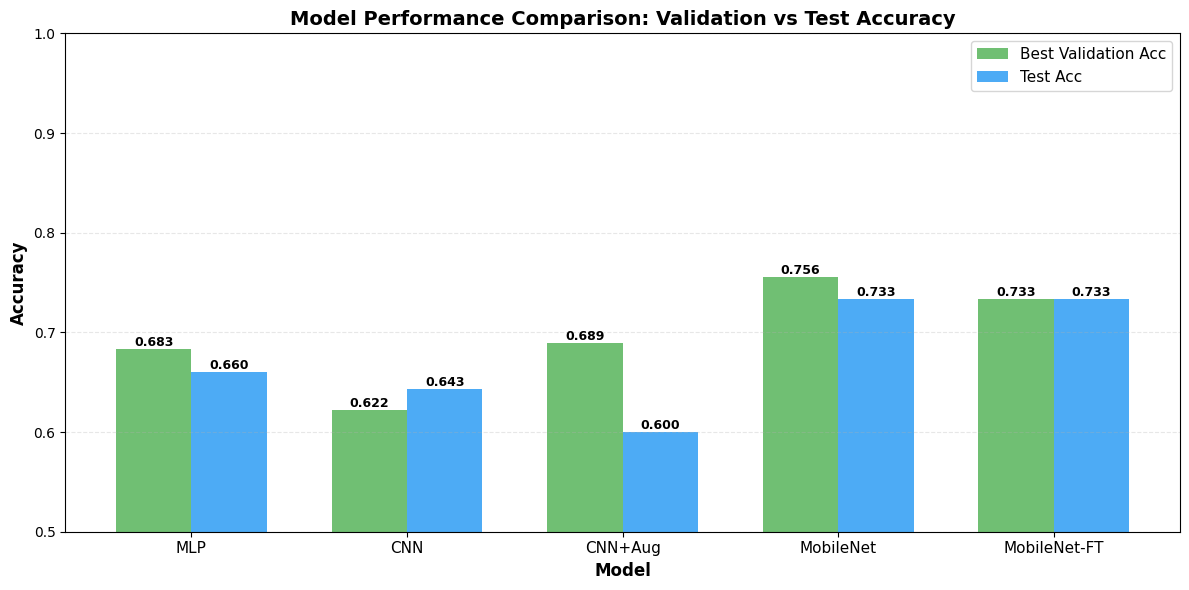


DETAILED PERFORMANCE METRICS
Model              Val Acc      Test Acc     Gap       
------------------------------------------------------------
MLP                0.6833       0.6600       +0.0233
CNN                0.6222       0.6433       -0.0211
CNN+Aug            0.6889       0.6000       +0.0889
MobileNet          0.7556       0.7333       +0.0222
MobileNet-FT       0.7333       0.7333       +0.0000

📊 Generating confusion matrices for all models...


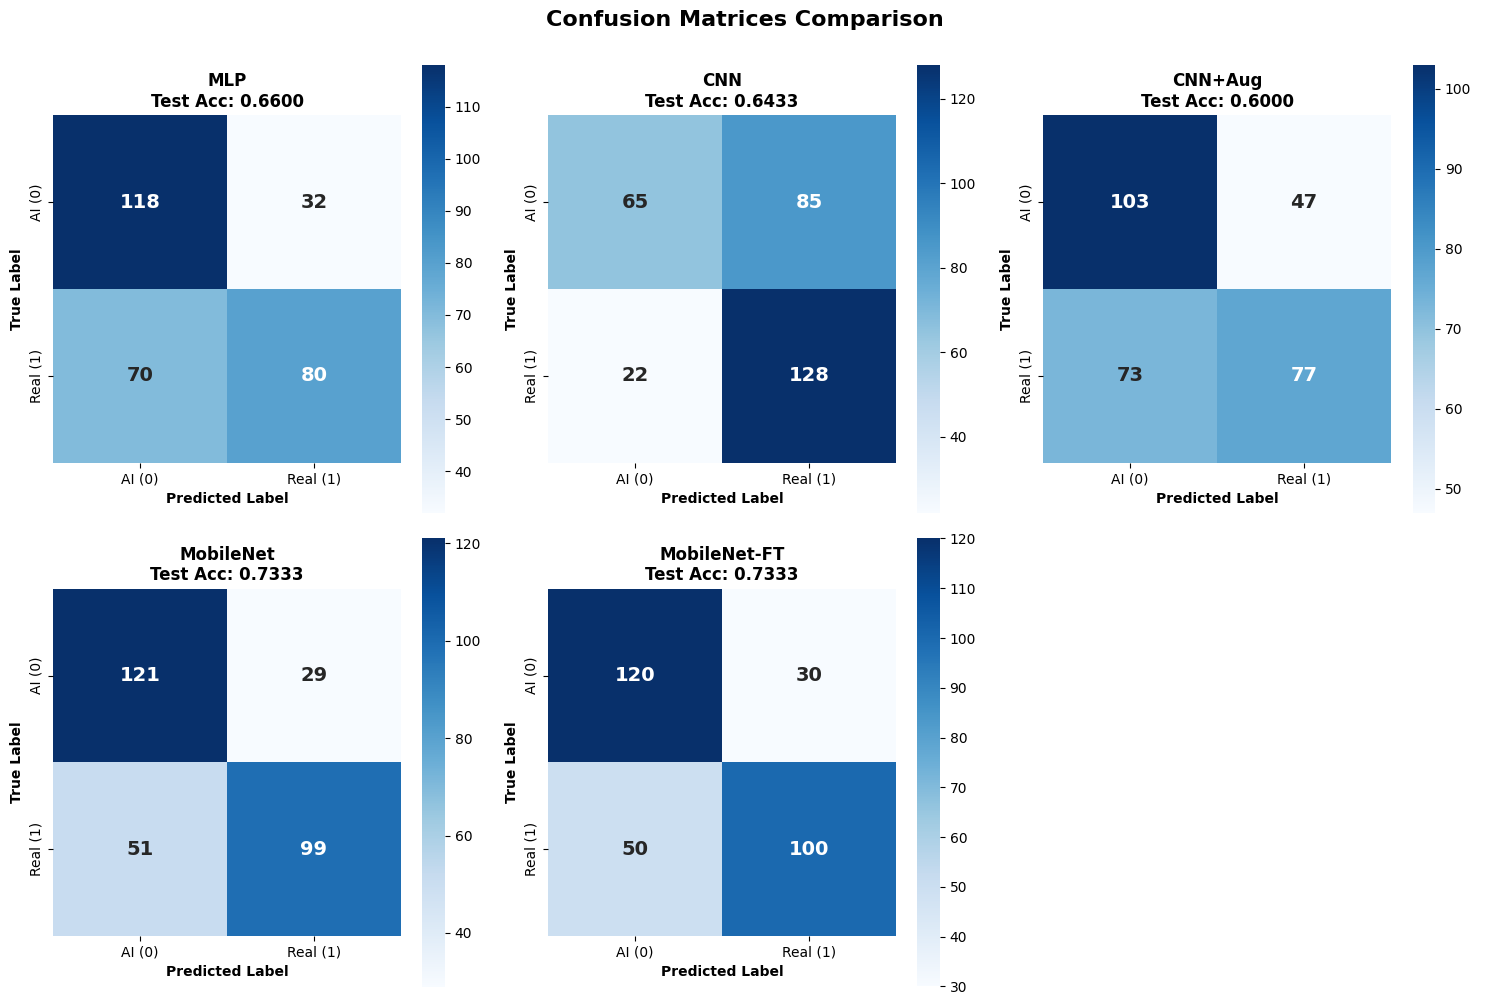


🖼️ Generating qualitative analysis with sample predictions...


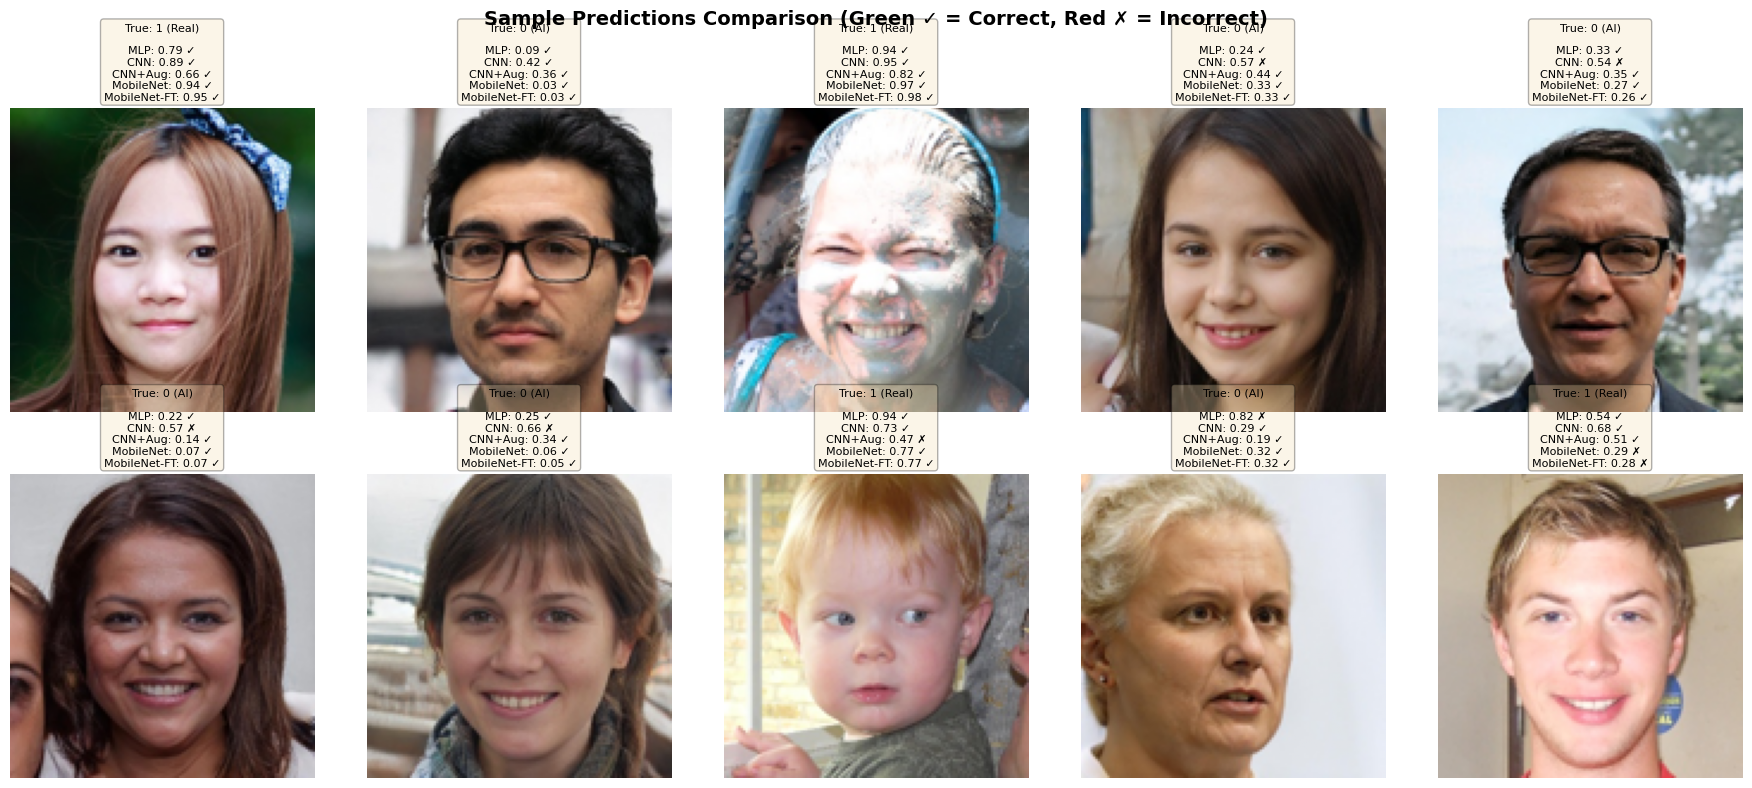


ANALYSIS SUMMARY

1. 🏆 Best Performing Model on Test Set:
   MobileNet with 0.7333 accuracy

2. 📊 Best Generalization (smallest val-test gap):
   MobileNet-FT with gap of +0.0000

3. 🎭 Confusion Patterns:
   MLP                Precision: 0.714  Recall: 0.533
   CNN                Precision: 0.601  Recall: 0.853
   CNN+Aug            Precision: 0.621  Recall: 0.513
   MobileNet          Precision: 0.773  Recall: 0.660
   MobileNet-FT       Precision: 0.769  Recall: 0.667

4. 🤝 Model Consensus Analysis:
   All models agree: 82/300 samples (27.3%)
   - All correct: 72 samples
   - All wrong: 10 samples

5. 🎯 Most Challenging Samples:
   Hardest sample (index 39): 5/5 models wrong
   True label: 1 (Real)

✅ Model comparison and analysis complete!


In [16]:
# ============================================================
# Part 7 - Model Comparison & Analysis
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

print("="*60)
print("MODEL COMPARISON & ANALYSIS")
print("="*60)

# ============================================================
# 1. Performance Comparison Bar Chart
# ============================================================

# Collect all performance metrics
model_names = ['MLP', 'CNN', 'CNN+Aug', 'MobileNet', 'MobileNet-FT']

# Validation accuracies (best from training history)
val_accuracies = [
    best_val_acc_mlp,
    best_val_acc_cnn,
    best_val_acc_cnn_aug,
    best_val_acc_mob_frozen,
    best_val_acc_mob_finetuned
]

# Test accuracies
test_accuracies = [
    mlp_test_acc,
    cnn_test_acc,
    cnn_aug_test_acc,
    mob_frozen_test_acc,
    mob_finetuned_test_acc
]

# Create grouped bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, val_accuracies, width, label='Best Validation Acc', color='#4CAF50', alpha=0.8)
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Acc', color='#2196F3', alpha=0.8)

# Customize the chart
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison: Validation vs Test Accuracy', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim([0.5, 1.0])
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

# Print detailed performance table
print("\n" + "="*60)
print("DETAILED PERFORMANCE METRICS")
print("="*60)
print(f"{'Model':<18} {'Val Acc':<12} {'Test Acc':<12} {'Gap':<10}")
print("-"*60)
for i, name in enumerate(model_names):
    gap = val_accuracies[i] - test_accuracies[i]
    print(f"{name:<18} {val_accuracies[i]:<12.4f} {test_accuracies[i]:<12.4f} {gap:>+.4f}")
print("="*60)

# ============================================================
# 2. Confusion Matrices Grid
# ============================================================

print("\n📊 Generating confusion matrices for all models...")

# Load all best models
models_dict = {
    'MLP': load_model('best_mlp.keras'),
    'CNN': load_model('best_cnn.keras'),
    'CNN+Aug': load_model('best_cnn_aug.keras'),
    'MobileNet': load_model('best_mobilenet_frozen.keras'),
    'MobileNet-FT': load_model('best_mobilenet_finetuned.keras')
}

# Generate predictions for all models
predictions_dict = {}
for name, model in models_dict.items():
    if 'MobileNet' in name:
        # MobileNet models need preprocessed data [0, 255]
        y_pred_prob = model.predict(X_test_pp, verbose=0)
    else:
        # Other models use [0, 1] data
        y_pred_prob = model.predict(X_test, verbose=0)

    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    predictions_dict[name] = y_pred

# Create 2x3 subplot grid for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, y_pred) in enumerate(predictions_dict.items()):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy
    acc = (y_pred == y_test).mean()

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['AI (0)', 'Real (1)'],
                yticklabels=['AI (0)', 'Real (1)'],
                ax=axes[idx], cbar=True, square=True,
                annot_kws={'fontsize': 14, 'fontweight': 'bold'})

    axes[idx].set_title(f'{name}\nTest Acc: {acc:.4f}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10, fontweight='bold')

# Hide the last subplot (we have 5 models, 6 subplots)
axes[5].axis('off')

plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================================
# 3. Qualitative Analysis - Sample Predictions
# ============================================================

print("\n🖼️ Generating qualitative analysis with sample predictions...")

# Get predictions probabilities for all models
pred_probs_dict = {}
for name, model in models_dict.items():
    if 'MobileNet' in name:
        pred_probs = model.predict(X_test_pp, verbose=0).flatten()
    else:
        pred_probs = model.predict(X_test, verbose=0).flatten()
    pred_probs_dict[name] = pred_probs

# Find interesting samples: correct and incorrect predictions
correct_samples = []
incorrect_samples = []

for i in range(len(y_test)):
    predictions = [pred_probs_dict[name][i] for name in model_names]
    pred_labels = [(p > 0.5) for p in predictions]

    # Check if at least one model got it right
    any_correct = any(pred_labels[j] == y_test[i] for j in range(len(model_names)))
    # Check if at least one model got it wrong
    any_incorrect = any(pred_labels[j] != y_test[i] for j in range(len(model_names)))

    if any_correct and any_incorrect:  # Disagreement between models
        incorrect_samples.append(i)
    elif all(pred_labels[j] == y_test[i] for j in range(len(model_names))):  # All correct
        correct_samples.append(i)

# Select 4 correct and 6 incorrect samples (or fewer if not available)
np.random.seed(42)
selected_correct = np.random.choice(correct_samples, size=min(3, len(correct_samples)), replace=False) if correct_samples else []
selected_incorrect = np.random.choice(incorrect_samples, size=min(7, len(incorrect_samples)), replace=False) if incorrect_samples else []
selected_indices = list(selected_correct) + list(selected_incorrect)

# Display selected samples
num_samples = len(selected_indices)
cols = 5
rows = (num_samples + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
if rows == 1:
    axes = axes.reshape(1, -1)

for idx, sample_idx in enumerate(selected_indices):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col]

    # Display image
    img = X_test[sample_idx].reshape(128, 128, 3)
    ax.imshow(img)
    ax.axis('off')

    # Get true label
    true_label = int(y_test[sample_idx])
    true_label_str = "Real" if true_label == 1 else "AI"

    # Get predictions from all models
    title_lines = [f"True: {true_label} ({true_label_str})", ""]

    for model_name in model_names:
        pred_prob = pred_probs_dict[model_name][sample_idx]
        pred_label = int(pred_prob > 0.5)
        is_correct = (pred_label == true_label)

        # Color-code: green for correct, red for incorrect
        check_mark = "✓" if is_correct else "✗"
        color = "green" if is_correct else "red"

        title_lines.append(f"{model_name}: {pred_prob:.2f} {check_mark}")

    # Set title with predictions
    ax.set_title("\n".join(title_lines), fontsize=8, ha='center',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Hide empty subplots
for idx in range(num_samples, rows * cols):
    row = idx // cols
    col = idx % cols
    axes[row, col].axis('off')

plt.suptitle('Sample Predictions Comparison (Green ✓ = Correct, Red ✗ = Incorrect)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# 4. Analysis Summary
# ============================================================

print("\n" + "="*60)
print("ANALYSIS SUMMARY")
print("="*60)

# 1. Performance Ranking
best_idx = np.argmax(test_accuracies)
print(f"\n1. 🏆 Best Performing Model on Test Set:")
print(f"   {model_names[best_idx]} with {test_accuracies[best_idx]:.4f} accuracy")

# 2. Generalization (smallest train-validation gap)
gaps = [val_accuracies[i] - test_accuracies[i] for i in range(len(model_names))]
best_gen_idx = np.argmin(np.abs(gaps))
print(f"\n2. 📊 Best Generalization (smallest val-test gap):")
print(f"   {model_names[best_gen_idx]} with gap of {gaps[best_gen_idx]:+.4f}")

# 3. Confusion Patterns
print(f"\n3. 🎭 Confusion Patterns:")
for name, y_pred in predictions_dict.items():
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    print(f"   {name:<18} Precision: {precision:.3f}  Recall: {recall:.3f}")

# 4. Model Agreement
print(f"\n4. 🤝 Model Consensus Analysis:")
agreement_count = 0
all_correct_count = 0
all_wrong_count = 0

for i in range(len(y_test)):
    predictions = [predictions_dict[name][i] for name in model_names]
    true_label = y_test[i]

    # Check if all models agree
    if len(set(predictions)) == 1:
        agreement_count += 1
        if predictions[0] == true_label:
            all_correct_count += 1
        else:
            all_wrong_count += 1

print(f"   All models agree: {agreement_count}/{len(y_test)} samples ({100*agreement_count/len(y_test):.1f}%)")
print(f"   - All correct: {all_correct_count} samples")
print(f"   - All wrong: {all_wrong_count} samples")

# 5. Most Challenging Samples
print(f"\n5. 🎯 Most Challenging Samples:")
error_counts = np.zeros(len(y_test))
for name, y_pred in predictions_dict.items():
    error_counts += (y_pred != y_test).astype(int)

hardest_idx = np.argmax(error_counts)
easiest_idx = np.argmin(error_counts)

print(f"   Hardest sample (index {hardest_idx}): {int(error_counts[hardest_idx])}/{len(model_names)} models wrong")
print(f"   True label: {int(y_test[hardest_idx])} ({'Real' if y_test[hardest_idx]==1 else 'AI'})")

print("\n" + "="*60)
print("✅ Model comparison and analysis complete!")
print("="*60)

## 🎮 [TO DO] Part 8: Interactive Game - Human vs. AI Detector

### 🤖 **Can You Beat Your Model?**

Time to make your project interactive! Build a fun game where humans compete against your best-performing model to identify AI-generated faces. Deploy it on Hugging Face Spaces to share with the world!

#### 🎯 **Your Task:**
Create a Gradio interface that gamifies the real vs. AI face detection challenge, then deploy it on Hugging Face Spaces.
- Check out [Which Face is Real?](https://whichfaceisreal.com/) for inspiration


#### 📝 **Implementation Requirements:**

1. **🎯 Core Game Mechanics**:
   - Display pairs or single images from the test set
   - User guesses: Real or AI-generated?
   - Model makes its prediction
   - Compare results and keep score
   - Track accuracy for both human and model

2. **🖼️ Interface Components**:
   - Image display area
   - "Real" and "AI-Generated" buttons for user input
   - Score display (Human vs. Model)
   - "Next Image" button to continue playing
   - Results/feedback area showing correct answer

3. **🎨 Game Features to Implement**:
   - **Round Counter**: Track number of images tested
   - **Live Scoring**: Human accuracy vs. Model accuracy
   - **Feedback**: Reveal correct answer with visual feedback
   - **Final Summary**: After N rounds, show who won!

4. **🚀 Deployment Steps**:
   - Save your best model as `best_model.h5` or `.keras`
   - Create `app.py` with your Gradio interface
   - Create `requirements.txt` with dependencies
   - Deploy to Hugging Face Spaces
   - Test with friends and family!


### >>> **Some Optional Tips**: <<<<
#### 📋 **Gradio Interface Structure**:
Use `gr.Blocks()` for custom layout with themes like `gr.themes.Soft()`. Structure your interface with:
- Title and instructions at the top
- Game area with image and buttons in the middle
- Scores and results at the bottom

#### 💡 **Pro Tips:**
- Pre-load a batch of test images for smooth gameplay
- Make it mobile-responsive with `gr.Blocks()`


#### 🎨 **Design**:
- Make it your own, but consider:
  - A nice layout
  - Scoring systems
  - Creative visual feedback (confetti for wins, color changes)


#### 📦 **Files for Hugging Face Spaces**:
1. `app.py` - Your Gradio application
2. `best_model.keras` - Your trained model
3. `requirements.txt` - Include: `tensorflow`, `gradio`, `numpy`, `Pillow`
4. `test_images/` - Folder with sample test images
5. `README.md` - Describe your project


🚀 **Time to bring your model to life! Create an engaging game that educates and entertains:**

## 📦 Final Deliverables

Submit the following:

1. **Completed Colab Notebook URL**
   - Fully executed with all outputs visible
   
2. **Brief Report (1-3 pages PDF)**
   - Model performance comparison table
   - Key learning curves
   - Main insights and conclusions
   
3. **Hugging Face Spaces URL**
   - Working Gradio demo with your best model

## ✅ Submission Checklist

Before submitting, ensure you have:
- [x] Completed all code sections (Parts 4-7)
- [x] All models achieve reasonable accuracy
- [x] Created all required visualizations
- [x] Colab runs without errors from top to bottom
- [ ] Report is clear and concise (≤3 pages)
- [ ] Gradio app successfully deployed and working
- [ ] All URLs are accessible and functional

**Good luck! 🚀**